In [1]:
import math as m, numpy as np, matplotlib.pyplot as plt

95% rise time = 14.9 ms
5% settling time = 209 ms


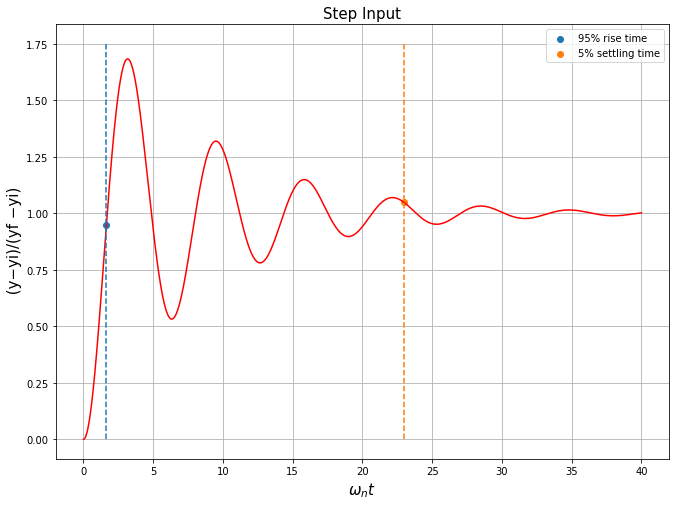

In [2]:
#1 a)

omega_n = 110 
zeta = 0.12

# zeta**2 -1 = -0.9856 Thus, this is an underdamped system

phi = m.asin(m.sqrt(1 - zeta**2))
tau = 1/(zeta*omega_n)
t = np.arange(0,0.363636363636, 0.00001) #the 0.36 value yeilds omega_n*t to be 40 as requested in the prompt
# assume KA = 1
y = (1 - np.exp(-zeta*omega_n*t)*(1/m.sqrt(1 - zeta**2)*np.sin(omega_n*t*m.sqrt(1 - zeta**2) + phi)))

#find yi and yf
#tf = infinity
ti = 0
yi = (1 - np.exp(-zeta*omega_n*ti)*(1/m.sqrt(1 - zeta**2)*np.sin(omega_n*ti*m.sqrt(1 - zeta**2) + phi)))
#we see that yf tends to KA (in this case KA = 1) when tf = infinity
yf = 1

plt.plot(omega_n*t,(y-yi)/(yf-yi), c='r')
plt.grid()
plt.gcf().set_size_inches(11,8)
plt.title('Step Input',fontsize='15')
plt.xlabel('$\omega_nt$', fontsize='15')
plt.ylabel(' (y−yi)/(yf −yi)',fontsize='15')


#1 b) 

y_95rise = 0.95*yf
y_5settle = 1.05*yf
flag1 = False
flag2 = False

for i in t: 
    y = (1 - np.exp(-zeta*omega_n*i)*(1/m.sqrt(1 - zeta**2)*np.sin(omega_n*i*m.sqrt(1 - zeta**2) + phi)))
    if (y_95rise + 0.0005) > y > (y_95rise - 0.0005) and flag1 == False:
        print('95% rise time =',str(round(i*1000, 1)),'ms')
        plt.scatter(i*omega_n,y, label='95% rise time')
        plt.plot(i*omega_n*np.ones(50),np.linspace(0,1.75,50), linestyle='--')
        flag1 = True 
        
for j in np.flip(t):
    y = (1 - np.exp(-zeta*omega_n*j)*(1/m.sqrt(1 - zeta**2)*np.sin(omega_n*j*m.sqrt(1 - zeta**2) + phi)))
    if (y_5settle < y or y < y_95rise) and flag2 == False:
        print('5% settling time =',str(round(j*1000,0))[:-2],'ms')
        plt.scatter(j*omega_n,y, label='5% settling time')
        plt.plot(j*omega_n*np.ones(50),np.linspace(0,1.75,50), linestyle='--')
        flag2 = True 
    
plt.legend(loc='best')

Text(0, 0.5, 'y(t)')

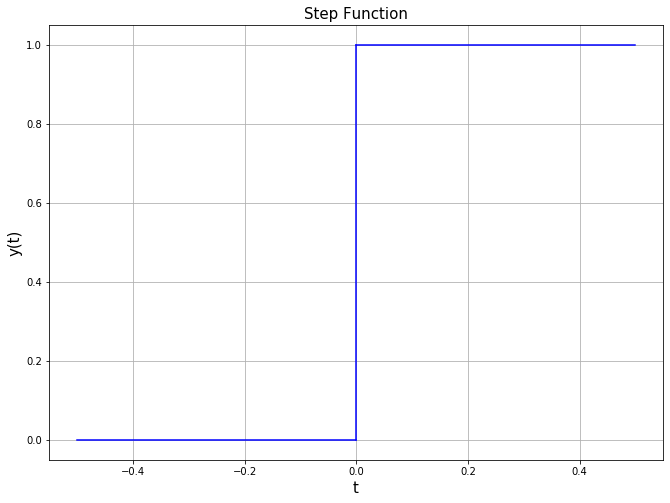

In [3]:
#2 a)

f1 = np.zeros(500)
f2 = np.ones(500)
f3 = np.arange(0,1,0.001)
t3 = np.zeros(1000)
t1 = np.arange(-0.5,0,0.001)
t2 = np.arange(0,0.5,0.001)

plt.plot(t1,f1, c='b')
plt.plot(t2,f2, c='b')
plt.plot(t3,f3, c='b')
plt.grid()
plt.gcf().set_size_inches(11,8)
plt.title('Step Function',fontsize='15')
plt.xlabel('t', fontsize='15')
plt.ylabel('y(t)',fontsize='15')


2 b) Using:
\begin{align*}
A_0 & = \frac{2}{T} \int_{-T/2}^{T/2} y(t) dt\\
A_n & = \frac{2}{T} \int_{-T/2}^{T/2} y(t) \cos \left(\frac{2 \pi n t}{T} \right) dt\\
B_n & = \frac{2}{T} \int_{-T/2}^{T/2} y(t) \sin \left(\frac{2 \pi n t}{T} \right) dt
\end{align*}

we can find the $A_0,\,A_n,\,B_n $ values of the function $f(t)$: 
\begin{align*}
where\, T=1\\
A_0 & = \frac{2}{1} \int_{-1/2}^{0} 0 dt + \frac{2}{1} \int_{0}^{1/2} 1dt,\Rightarrow A_0 = 1\\
A_n & = \frac{2}{1} \int_{-1/2}^{0} 0 \cos \left(\frac{2 \pi n t}{1} \right) dt + \frac{2}{1} \int_{0}^{1/2} 1 \cos \left(\frac{2 \pi n t}{1} \right) dt\\
\Rightarrow 2 \sin \left(2 \pi n (1/2) \right) \Rightarrow A_n=0\, for \, all \, integers\, n\\
B_n & = \frac{2}{1} \int_{-1/2}^{0} 0 \sin \left(\frac{2 \pi n t}{1} \right) dt + \frac{2}{1} \int_{0}^{1/2} 1 \sin \left(\frac{2 \pi n t}{1} \right) dt \\ \Rightarrow 2 \int_{0}^{1/2} \sin \left(2 \pi n t\right) dt \Rightarrow \frac{-1}{\pi n} \cos \left(2 \pi n t\right)\Big|_0^{1/2} \Rightarrow -\frac{1}{\pi n} cos(\pi n)+\frac{1}{\pi n}  \\ \Rightarrow B_n =0 for\, all\, even\, values\, of\, n\, and\, \frac{2}{\pi n}  \,for\,all \,odd\, values\, of \, n
\end{align*}

Text(0.5, 1.0, 'Periodic Function: 10 Harmonics')

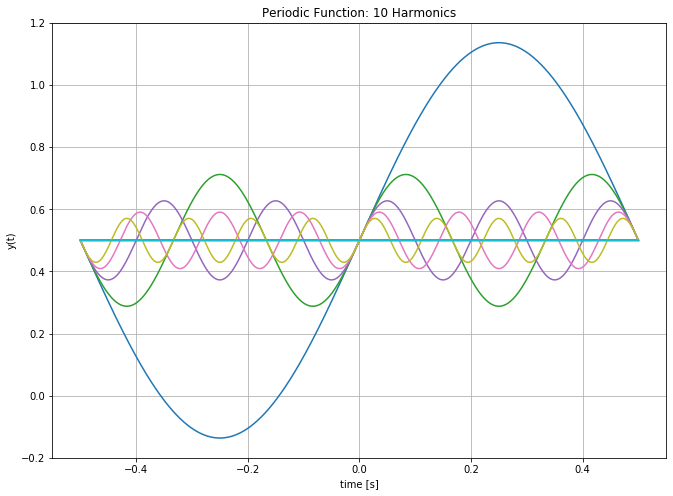

In [4]:
# 2 c) 
t = np.arange(-0.5,0.5, 0.0001)
a0 = 1
y = 0
n = 10
for i in range(1,n+1):
    # the A_n term is eliminated as A_n = 0
    # T = 1
    y = a0/2 + (-1/(m.pi*i)*np.cos(m.pi*i) + 1/(m.pi*i))*np.sin(2*m.pi*i*t)
    plt.plot(t,y)

plt.grid()
plt.gcf().set_size_inches(11,8)
plt.xlabel('time [s]')
plt.ylabel('y(t)')
plt.title('Periodic Function: 10 Harmonics')


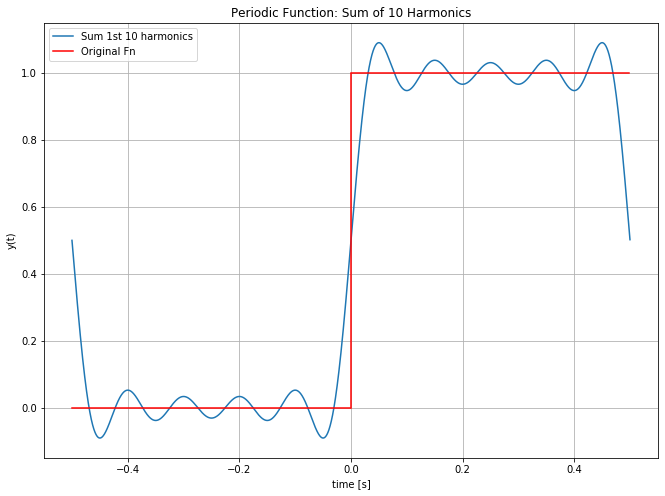

In [22]:
# 2 d)
t = np.arange(-0.5,0.5, 0.0001)
a0 = 1
y = 0
n = 10
for i in range(1,n+1):
    # the A_n term is eliminated as A_n = 0
    # T = 1
    y = y + (-1/(m.pi*i)*np.cos(m.pi*i) + 1/(m.pi*i))*np.sin(2*m.pi*i*t)
y = y + a0/2

plt.plot(t,y,label='Sum 1st 10 harmonics')
plt.grid()
plt.gcf().set_size_inches(11,8)
plt.xlabel('time [s]')
plt.ylabel('y(t)')
plt.title('Periodic Function: Sum of 10 Harmonics')
f1 = np.zeros(500)
f2 = np.ones(500)
f3 = np.arange(0,1,0.001)
t3 = np.zeros(1000)
t1 = np.arange(-0.5,0,0.001)
t2 = np.arange(0,0.5,0.001)

plt.plot(t1,f1, c='r', label='Original Fn')
plt.plot(t2,f2, c='r')
plt.plot(t3,f3, c='r')
plt.gcf().set_size_inches(11,8)
plt.legend(loc='best')
'''The discrepancy between the original function and the sum of the first 10 harmonics appears to be the  cosine/sine
      curve that oscillates about the true value. The discrepancy likely arises from the use of an analog input
      as opposed to the digital input used in the original function where the value is either high (1V) or low (0V).'''
      

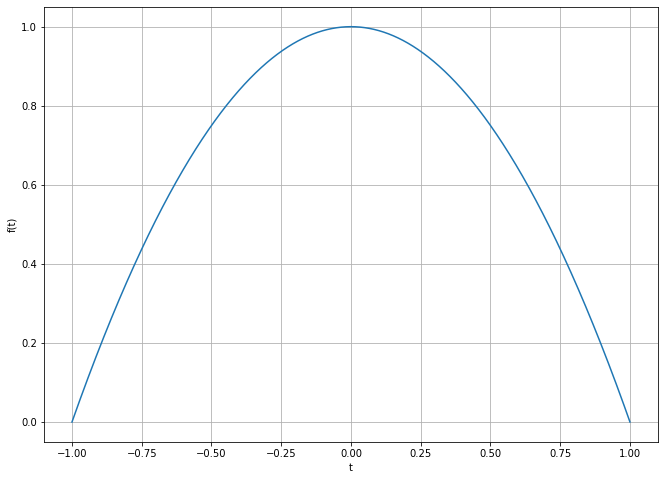

In [6]:
# 3 a) 
t = np.arange(-1,1,0.00001)
f = 1 - t**2

plt.plot(t,f)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.gcf().set_size_inches(11,8)



3 b) 

Using 
\begin{align*}
A_0 & = \frac{2}{T} \int_{-T/2}^{T/2} y(t) dt\\
A_n & = \frac{2}{T} \int_{-T/2}^{T/2} y(t) \cos \left(\frac{2 \pi n t}{T} \right) dt\\
B_n & = \frac{2}{T} \int_{-T/2}^{T/2} y(t) \sin \left(\frac{2 \pi n t}{T} \right) dt
\end{align*}
we can find the $A_0,\,A_n,\,B_n $ values of the function $f(t)$: 
\begin{align*}
T=2 \\
A_0 & = \frac{2}{2} \int_{-1}^{1} (1-t^2) dt = (t-\frac{t^3}{3}) \Big|_{-1}^{1}=4/3 \\
A_n & = \frac{2}{2} \int_{-1}^{1} (1-t^2) \cos \left(\frac{2 \pi n t}{2} \right) dt \\
= \int_{-1}^{1} \cos \left(\pi nt\right)-t^2\cos \left(\pi nt\right) =\int _{-1}^1\cos \left(\pi nt\right)dt-\int _{-1}^1t^2\cos \left(\pi nt\right)dt\\
\Rightarrow \int _{-1}^1\cos \left(\pi nt\right)dt =0 \\
\Rightarrow \int _{-1}^1t^2\cos \left(\pi nt\right)dt=\frac{4\left(-1\right)^{n+1}}{\pi ^2n^2}\\
\Rightarrow A_n = \frac{4\left(-1\right)^{n+1}}{\pi ^2n^2}\\
B_n & = \frac{2}{2} \int_{-1}^{1} (1-t^2) \sin \left(\frac{2 \pi n t}{2} \right) dt =\int_{-1}^{1} \sin \left(\pi nt\right)-t^2\sin \left(\pi nt\right)\\
\sin \left(\pi nt\right)-t^2\sin \left(\pi nt\right)\mathrm{\:is\:an\:odd\:function,\:therefore,}\,B_n =0
\end{align*}

Text(0.5, 1.0, 'Periodic Function: 10 Harmonics')

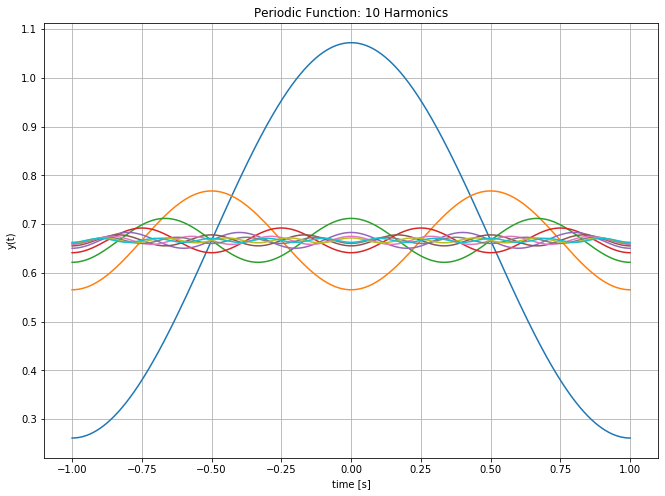

In [10]:
# 3 c)

t = np.arange(-1,1, 0.0001)
a0 = 4/3
n = 10
for i in range(1,n+1):
    # the B_n term is eliminated as B_n = 0
    # T = 2
    y = a0/2 + ((4*(-1)**(i+1))/(m.pi**2*i**2))*np.cos(m.pi*i*t)
    plt.plot(t,y)

plt.grid()
plt.gcf().set_size_inches(11,8)
plt.xlabel('time [s]')
plt.ylabel('y(t)')
plt.title('Periodic Function: 10 Harmonics')

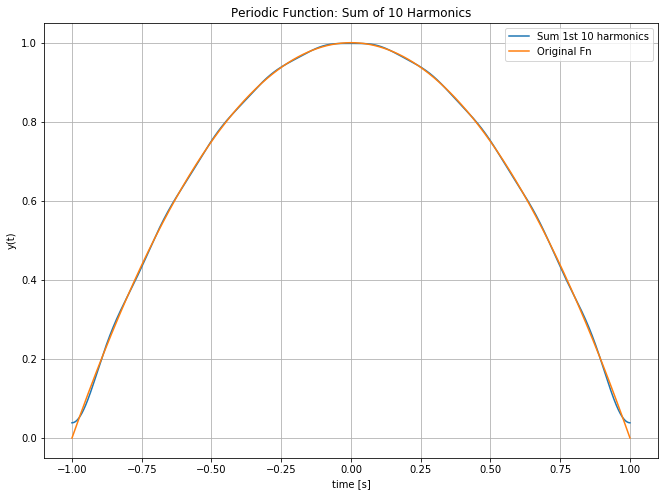

In [20]:
# 3 d)

t = np.arange(-1,1, 0.0001)
a0 = 4/3
y = 0
n = 10
for i in range(1,n+1):
    # the B_n term is eliminated as B_n = 0
    # T = 2
    y = y + ((4*(-1)**(i+1))/(m.pi**2*i**2))*np.cos(m.pi*i*t)
    
y = y + a0/2

plt.plot(t,y, label='Sum 1st 10 harmonics')
plt.grid()
plt.gcf().set_size_inches(11,8)
plt.xlabel('time [s]')
plt.ylabel('y(t)')
plt.title('Periodic Function: Sum of 10 Harmonics')

t = np.arange(-1,1,0.00001)
f = 1 - t**2

plt.plot(t,f, label='Original Fn')
plt.legend(loc='best')

'''The discrepancy that occurs is minimal as you can see. However, there appears a very slight oscillation about the 
    true value, this is due to the fact that the calculation for the first 10 harmonics includes a cosine term. 
    Additionally you can see that the boundary values are slightly off. '''

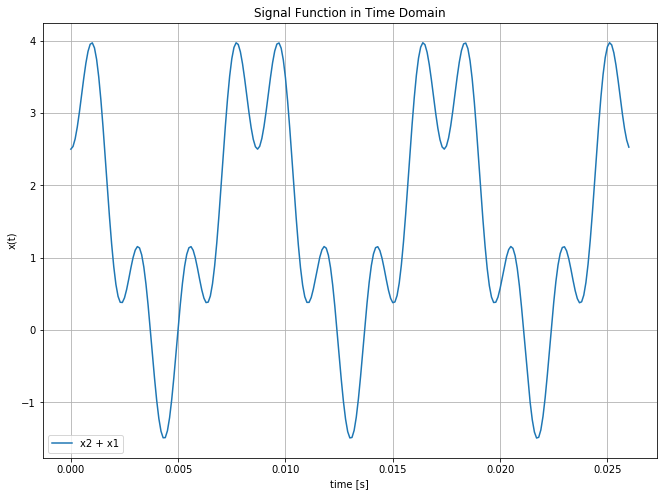

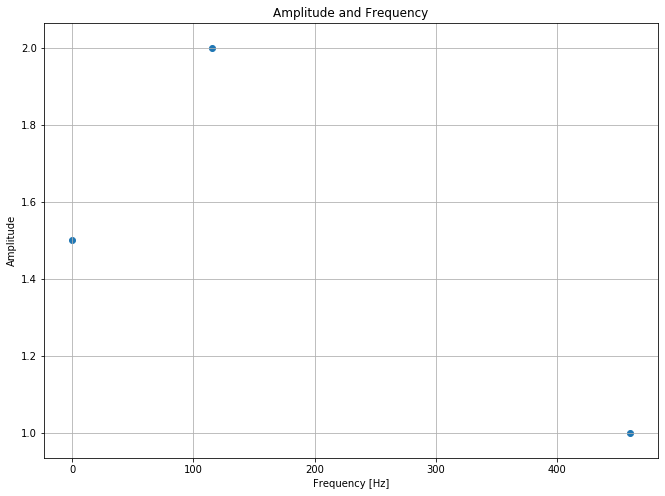

In [9]:
#4 a) 

f1 = 115
f2 = 460
A1 = 2
A2 = 1
T2 = 1/f2
T1 = 1/f1

Ts = 12*T2 # sampling time = 12 periods => arbitrary

t2 = np.arange(0,Ts,0.0001) #plot 12 periods of the fn

x1 = 2*np.cos(2*m.pi*f1*t2)
x2 = np.cos(2*m.pi*f2*t2 + m.pi) + 1.5

plt.plot(t2,x2+x1,label='x2 + x1')
plt.xlabel('time [s]')
plt.ylabel('x(t)')
plt.title('Signal Function in Time Domain')
plt.grid()
plt.gcf().set_size_inches(11,8)
plt.legend(loc='best')
plt.show()


frq = np.array([0,f1,f2])
amp = np.array([1.5,A1,A2])
plt.scatter(frq, amp)
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title('Amplitude and Frequency')
plt.gcf().set_size_inches(11,8)

# frqsp = np.fft.fft(x2, n=None, axis=-1)

# plt.plot(abs(frqsp))
# plt.grid()
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Spectrum')
# plt.title('Spectrum and Freq')
# plt.gcf().set_size_inches(11,8)